In [2]:
import sys
print("파이썬 버전은?", sys.version)

파이썬 버전은? 3.7.10 (default, May  3 2021, 02:48:31) 
[GCC 7.5.0]


In [1]:
from tensorflow.keras.datasets.mnist import load_data
(x_train, y_train), (x_test, y_test) = load_data(path='mnist.npz')

11493376/11490434 [==============================] - 0s 0us/step


In [2]:
# 훈련 데이터
print(x_train.shape, y_train.shape)
print(y_train)

(60000, 28, 28) (60000,)
[5 0 4 ... 5 6 8]


In [3]:
# 테스트 데이터
print(x_test.shape, y_test.shape)
print(y_test)

(10000, 28, 28) (10000,)
[7 2 1 ... 4 5 6]


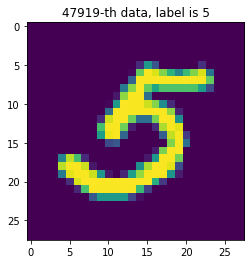

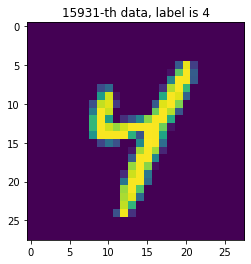

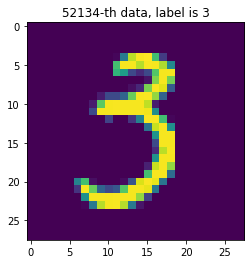

In [5]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(777)
sample_size = 3

# 0~59999의 범위 내 무작위로 3개의 정수 추출
random_idx = np.random.randint(60000, size = sample_size)

for idx in random_idx:
  img = x_train[idx, :]
  label = y_train[idx]
  plt.figure()
  plt.imshow(img)
  plt.title('%d-th data, label is %d' % (idx,label))

In [7]:
from sklearn.model_selection import train_test_split

# 훈련/테스트 데이터 0.7/0.3의 비율로 분리
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, 
                                                  test_size = 0.3, 
                                                  random_state = 777)

print(f'훈련 데이터:{x_train.shape}, 레이블:{y_train.shape}')
print(f'검증 데이터:{x_val.shape}, 레이블:{y_val.shape}')

훈련 데이터:(42000, 28, 28), 레이블:(42000,)
검증 데이터:(18000, 28, 28), 레이블:(18000,)


In [8]:
num_x_train = x_train.shape[0]
num_x_val = x_val.shape[0]
num_x_test = x_test.shape[0]

##전처리

x_train = (x_train.reshape((num_x_train, 28 * 28))) / 255
x_val = (x_val.reshape((num_x_val, 28 * 28))) / 255
x_test = (x_test.reshape((num_x_test, 28 * 28))) / 255

print(x_train.shape) # 모델 입력을 위해 데이터를 784차원으로 변경

(42000, 784)


In [9]:
from tensorflow.keras.utils import to_categorical

# 각 데이터의 레이블을 범주형 형태로 변경
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

print(y_train)

[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
# 입력 데이터의 형태 명시!
# 784차원의 데이터를 입력으로 받고, 64개의 출력을 가지는 첫 번째 Dense 층
model.add(Dense(64, activation = 'relu', input_shape = (784, )))
model.add(Dense(32, activation = 'relu')) # 32개의 출력을 가지는 Dense 층
model.add(Dense(10, activation = 'softmax')) # 10개의 출력을 가지는 신경망

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [12]:
# 소프트맥스 함수
def softmax(arr):
    m = np.max(arr)
    arr = arr - m # exp의 오버플로우 방지
    arr = np.exp(arr)
    return arr / np.sum(arr)

# 시그모이드 함수
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

case_1 = np.array([3.1, 3.0, 2.9])
case_2 = np.array([2.0, 1.0, 0.7])

np.set_printoptions(precision=3) # numpy 소수점 제한
print(f'sigmoid {sigmoid(case_1)}, softmax {softmax(case_1)}')
print(f'sigmoid {sigmoid(case_2)}, softmax {softmax(case_2)}')

sigmoid [0.957 0.953 0.948], softmax [0.367 0.332 0.301]
sigmoid [0.881 0.731 0.668], softmax [0.61  0.224 0.166]


In [13]:
model.compile(optimizer='adam', # 옵티마이저 : Adam
              loss = 'categorical_crossentropy', # 손실 함수 : categorical_crossentropy
              metrics=['acc']) # 모니터링 할 평가지표 : acc

In [14]:
history = model.fit(x_train, y_train, 
                    epochs = 30, 
                    batch_size = 128, 
                    validation_data = (x_val, y_val))

Epoch 1/30
329/329 [==============================] - 5s 6ms/step - loss: 0.4989 - acc: 0.8583 - val_loss: 0.2471 - val_acc: 0.9287
Epoch 2/30
329/329 [==============================] - 2s 5ms/step - loss: 0.2077 - acc: 0.9395 - val_loss: 0.1878 - val_acc: 0.9458
Epoch 3/30
329/329 [==============================] - 1s 4ms/step - loss: 0.1571 - acc: 0.9547 - val_loss: 0.1537 - val_acc: 0.9557
Epoch 4/30
329/329 [==============================] - 2s 5ms/step - loss: 0.1273 - acc: 0.9627 - val_loss: 0.1468 - val_acc: 0.9583
Epoch 5/30
329/329 [==============================] - 1s 4ms/step - loss: 0.1058 - acc: 0.9696 - val_loss: 0.1338 - val_acc: 0.9599
Epoch 6/30
329/329 [==============================] - 2s 5ms/step - loss: 0.0898 - acc: 0.9736 - val_loss: 0.1145 - val_acc: 0.9675
Epoch 7/30
329/329 [==============================] - 1s 4ms/step - loss: 0.0755 - acc: 0.9786 - val_loss: 0.1207 - val_acc: 0.9654
Epoch 8/30
329/329 [==============================] - 1s 4ms/step - loss: 0.

In [15]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

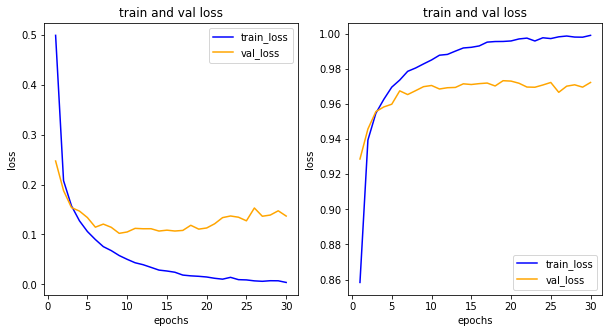

In [16]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] # 검증 데이터가 있는 경우 ‘val_’ 수식어

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_loss')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_loss')
ax2.set_title('train and val loss')
ax2.set_xlabel('epochs')
ax2.set_ylabel('loss')
ax2.legend()

plt.show()

In [17]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1275 - acc: 0.9719


[0.12746338546276093, 0.9718999862670898]

In [18]:
import numpy as np
np.set_printoptions(precision=7) # numpy 소수점 제한

results = model.predict(x_test)

print(results.shape)
print(f'각 클래스에 속할 확률 : \n{results[0]}')

(10000, 10)
각 클래스에 속할 확률 : 
[8.9196261e-13 1.1199625e-13 1.7975440e-08 4.8078387e-03 4.4278070e-20
 5.0504722e-11 1.1766911e-18 9.9518943e-01 6.8806962e-08 2.6057091e-06]


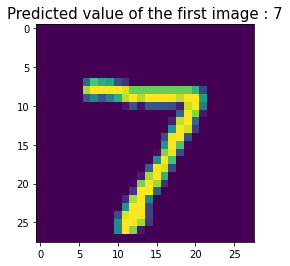

In [19]:
import matplotlib.pyplot as plt

arg_results = np.argmax(results, axis = -1) # 가장 큰 값의 인덱스를 가져옵니다.
plt.imshow(x_test[0].reshape(28, 28))
plt.title('Predicted value of the first image : ' + str(arg_results[0]), fontsize = 15)
plt.show()

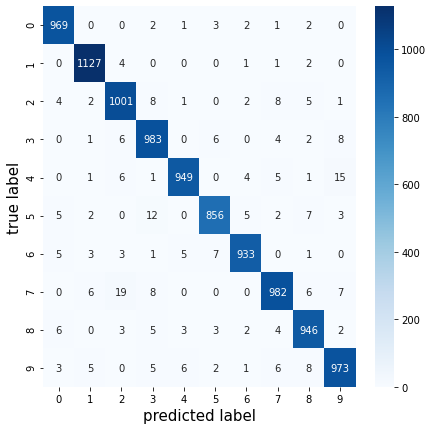

In [22]:
# sklearn.metrics 모듈: 여러가지 평가 지표에 관한 기능 제공
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 혼동 행렬 만들기
plt.figure(figsize = (7, 7))
cm = confusion_matrix(np.argmax(y_test, axis = -1), np.argmax(results, axis = -1))
sns.heatmap(cm, annot = True, fmt = 'd',cmap = 'Blues')
plt.xlabel('predicted label', fontsize = 15)
plt.ylabel('true label', fontsize = 15)
plt.show()


In [23]:
print('\n', classification_report(np.argmax(y_test, axis = -1), np.argmax(results, axis = -1)))


               precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.96      0.97      0.97      1032
           3       0.96      0.97      0.97      1010
           4       0.98      0.97      0.97       982
           5       0.98      0.96      0.97       892
           6       0.98      0.97      0.98       958
           7       0.97      0.96      0.96      1028
           8       0.97      0.97      0.97       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

